## 第七次练习

+ 请务必交到exer7文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请在12月20日前提交。

请写一下姓名和学号：
+ 姓名     姚迈
+ 学号     0165186

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

请参考下面命令将CEPS.csv数据读入python

In [2]:
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df.head()


C:\Users\27824\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2


下面的图都至少需要在图上标注：
+ 图标题
+ x轴标题
+ y轴标题
+ 适当修改x轴或者y轴的刻度及标签，使之清晰美观
+ 根据需要添加图例

### 散点图
反映期中考试标准化成绩语文（stdchn）和期中考试标准化成绩数学（stdmat）的相关关系

In [3]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [17]:
df_1 = df.sample(n=40)
xminorLocator   = MultipleLocator(10) #将x主刻度标签设置为20的倍数
xminorFormatter = FormatStrFormatter('%d') #设置x轴标签文本的格式

ymajorLocator   = MultipleLocator(10) #将y轴主刻度标签设置为0.5的倍数
ymajorFormatter = FormatStrFormatter('%d') #设置y轴标签文本的格式

Text(0,0.5,'数学成绩')

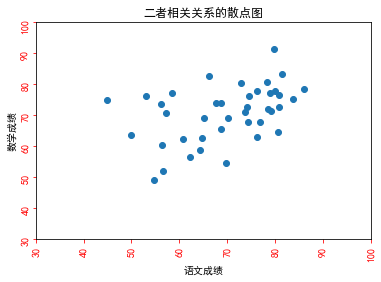

In [18]:
fig, ax1 = plt.subplots()
x=df_1['stdchn']
y=df_1['stdmat']
m = x.values
n = y.values
m= list(map(float, m))
n=list(map(float, n))

color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('y')

plt.scatter(m,n)

ax1.xaxis.set_major_locator(xminorLocator )
ax1.xaxis.set_major_formatter(xminorFormatter)

ax1.yaxis.set_major_locator(ymajorLocator)
ax1.yaxis.set_major_formatter(ymajorFormatter)

ax1.tick_params(colors='r',rotation=90)

ax1.set_xlim(30,100)
ax1.set_ylim(30,100)
ax1.set_title('二者相关关系的散点图')
ax1.set_xlabel('语文成绩')
ax1.set_ylabel('数学成绩')

### 饼图
对问题“你是独生子女吗”(b01)的回答有“是”和“否”两种回答，相应的数字分别是1和2。请画一个饼图反映二者的比例。

In [24]:
yes = sum(df.b01==1)
no = sum(df.b01==2)
print(yes)
print(no)

4900
6395


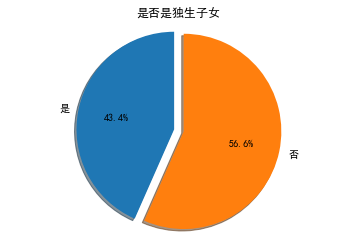

In [27]:

labels = '是', '否'
sizes = [4900, 6395]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.set_title("是否是独生子女")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 直方图
反映变量“每天晚上睡多长时间-小时”(b18a)的分布情况。

In [57]:
df_1 = df.sample(n=100)
data = df_1['b18a']
data = list(data)
data = list(map(int, data))

C:\Users\27824\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


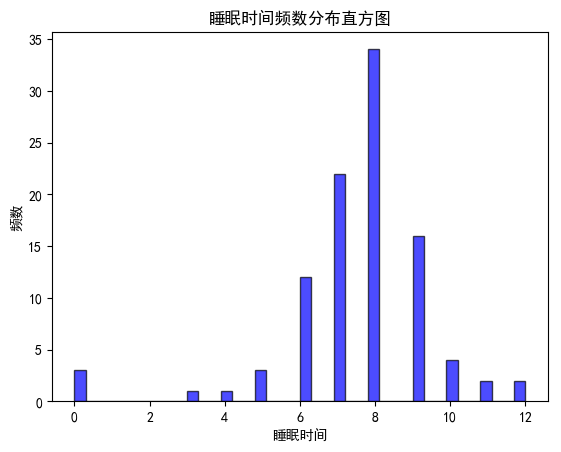

In [62]:
plt.hist(data, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("睡眠时间")
# 显示纵轴标签
plt.ylabel("频数")

plt.title("睡眠时间频数分布直方图")
plt.show()

### 柱图
反映变量"你妈妈是做什么工作的"(b08a)的职业分布情况，数字和编码关系如下：

+ 1	国家机关事业单位领导与工作人员
+ 2	企业/公司中高级管理人员
+ 3	教师、工程师、医生、律师
+ 4	技术工人（包括司机）
+ 5	生产与制造业一般职工
+ 6	商业与服务业一般职工
+ 7	个体户
+ 8	农民
+ 9 无业、失业、下岗


In [90]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [97]:
plt.rcdefaults()
df_1 = df.sample(n=10000)
data = df_1['b18a']
data =list(data)

x1 = data.count('1')
x2 = data.count('2')
x3 = data.count('3')
x4 = data.count('4')
x5 = data.count('5')
x6 = data.count('6')
x7 = data.count('7')
x8 = data.count('8')
x9 = data.count('9')
quantity = [x1,x2,x3,x4,x5,x6,x7,x8,x9]

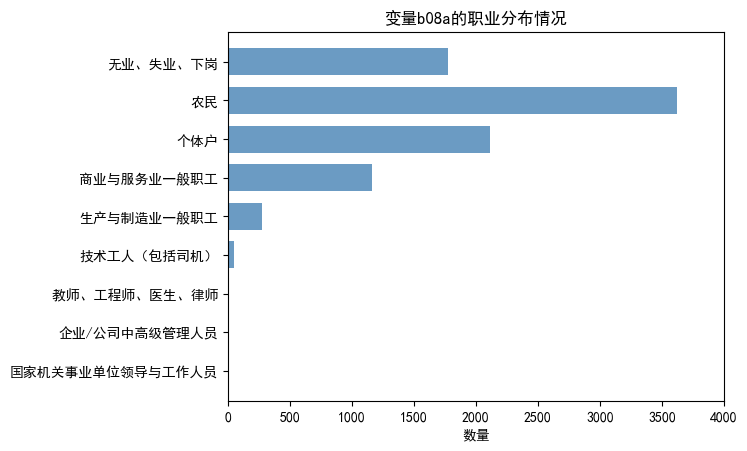

In [103]:
plt.barh(range(9), quantity, height=0.7, color='steelblue', alpha=0.8)      
plt.yticks(range(9), ['国家机关事业单位领导与工作人员', '企业/公司中高级管理人员', ' 教师、工程师、医生、律师',
          '技术工人（包括司机）', '生产与制造业一般职工','商业与服务业一般职工','个体户',
          '农民','无业、失业、下岗'])
plt.xlim(0,4000)
plt.xlabel("数量")
plt.title("变量b08a的职业分布情况")

plt.show()